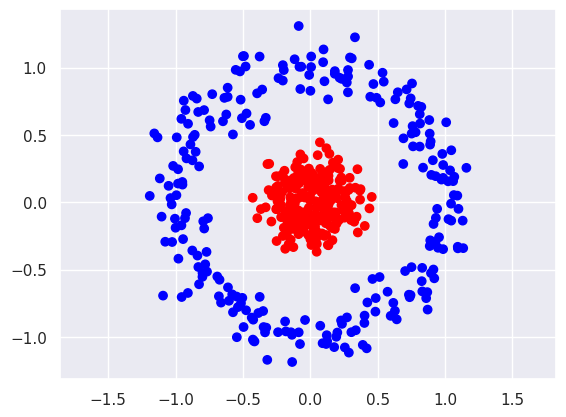

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors
import seaborn as sns
sns.set_theme(style="darkgrid")

X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors.ListedColormap(["blue", "red"]))
plt.axis('equal')
plt.show()

# Task 1 [30 points]
## Implement the Adaboost algorithm yourself from scratch.

In [57]:
import numpy as num_package
import pandas as pan_da
import matplotlib.pyplot as plot_lib
import matplotlib.colors as plot_colors

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

class AdaBoostClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier, num_classifiers=100, learning_rate=0.5):
        self.num_classifiers = num_classifiers
        self.learning_rate = learning_rate
        self.classifiers = []
        self.base_classifier = base_classifier
        self.classifier_weights = []

    def fit(self, feature_data, target_data):
        num_samples = len(target_data)
        sample_weights = num_package.ones(num_samples) / num_samples

        for iteration in range(self.num_classifiers):
            new_classifier = clone(self.base_classifier)
            new_classifier.fit(feature_data, target_data, sample_weight=sample_weights)

            predictions = new_classifier.predict(feature_data)

            error_rate = num_package.dot(sample_weights, (predictions != target_data))

            alpha = self.learning_rate * num_package.log((1 - error_rate) / (error_rate + 1e-10))

            sample_weights *= num_package.exp(alpha * (predictions != target_data))
            sample_weights /= num_package.sum(sample_weights)

            self.classifiers.append(new_classifier)
            self.classifier_weights.append(alpha)

    def predict(self, feature_data):
        classifier_predictions = num_package.array([alpha * classifier.predict(feature_data) for classifier, alpha in zip(self.classifiers, self.classifier_weights)])
        final_predictions = num_package.sign(num_package.sum(classifier_predictions, axis=0))
        return final_predictions

    def plot_decision_boundary(self, feature_data, target_data):
        x_min, x_max = feature_data[:, 0].min() - 1, feature_data[:, 0].max() + 1
        y_min, y_max = feature_data[:, 1].min() - 1, feature_data[:, 1].max() + 1
        xx, yy = num_package.meshgrid(num_package.arange(x_min, x_max, 0.01),
                             num_package.arange(y_min, y_max, 0.01))
        Z = self.predict(num_package.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 2)
        plot_lib.contourf(xx, yy, Z, alpha=0.6,  cmap=sns.color_palette("RdBu", as_cmap=True))
        plot_lib.scatter(feature_data[:, 0], feature_data[:, 1], c=target_data,  cmap=sns.color_palette("RdBu", as_cmap=True), edgecolor='k')
        plot_lib.title("final ensembled classifier decision boundary")
        plot_lib.axis('equal')
        plot_lib.show()

    def plot_iterations(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))


        for t in range(self.num_classifiers):
            Z = sum(self.classifier_weights[i] * self.classifiers[i].predict(np.c_[xx.ravel(), yy.ravel()]) for i in range(t + 1))
            Z = np.sign(Z).reshape(xx.shape)
            print("iteration : ", t)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            # plt.figure()  # Create a new figure for each iteration
            plt.contourf(xx, yy, Z, alpha=0.6, cmap=sns.color_palette("RdBu", as_cmap=True))
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap=sns.color_palette("RdBu", as_cmap=True), edgecolor='k')
            plt.title(f"Iteration {t + 1}")
            plt.axis('equal')
            plt.show()  #

## Fit the data

In [48]:
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

grid_search = GridSearchCV(estimator=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
                  param_grid={'learning_rate': [0.4, 0.5, 0.6],
                                'num_classifiers': [20, 50, 100, 200, 250]},
                  cv=5, refit=False, n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best Params:' + repr(grid_search.best_params_))
print('Best Score: %.3f'%grid_search.best_score_)


Best Params:{'learning_rate': 0.4, 'num_classifiers': 50}
Best Score: 0.989


In [ ]:
## calculate the accuracy

In [49]:

dt_stump = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), **grid_search.best_params_)
dt_stump.fit(X_train, y_train)

y_pred = dt_stump.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.3f}")


Test Accuracy: 0.992


## Plot decision boundary for each iterations

iteration :  0


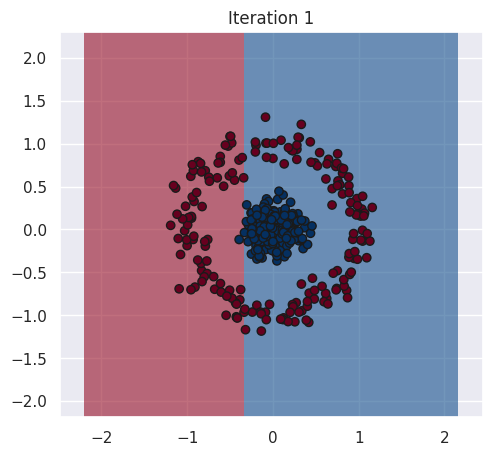

iteration :  1


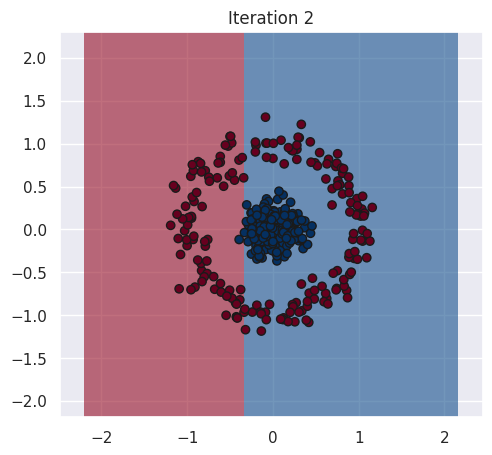

iteration :  2


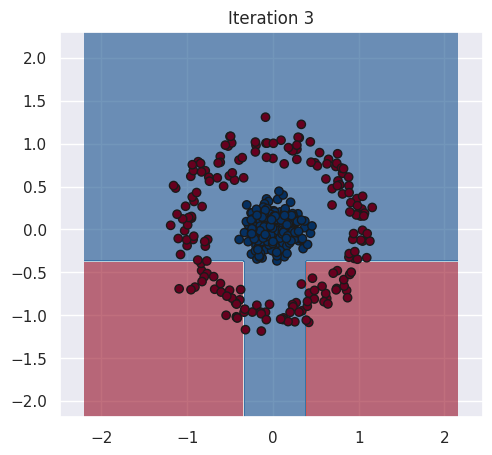

iteration :  3


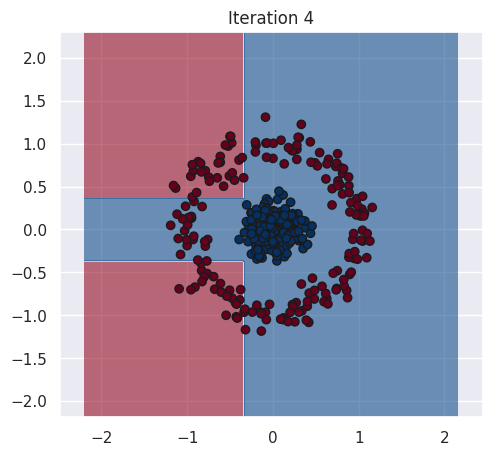

iteration :  4


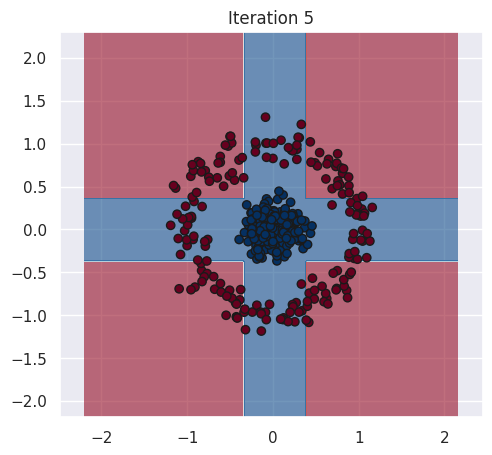

iteration :  5


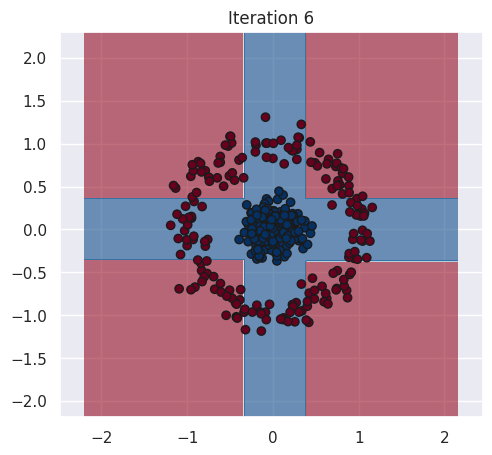

iteration :  6


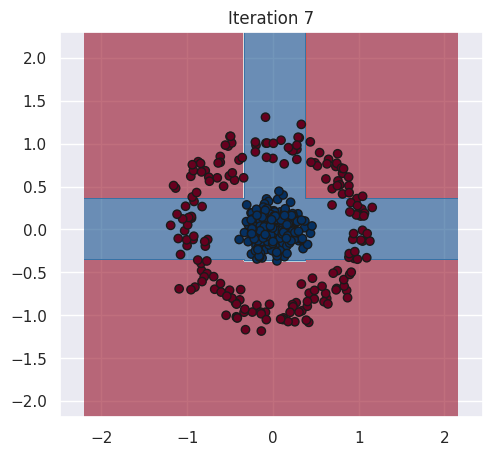

iteration :  7


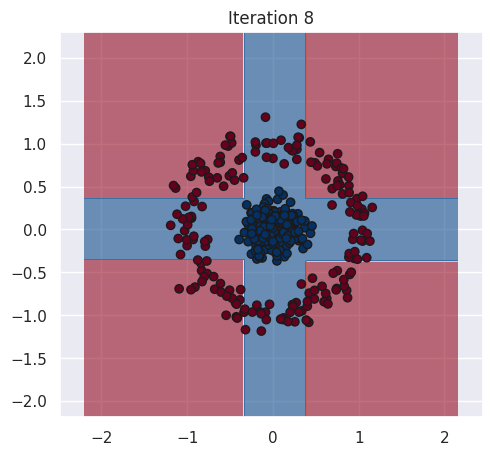

iteration :  8


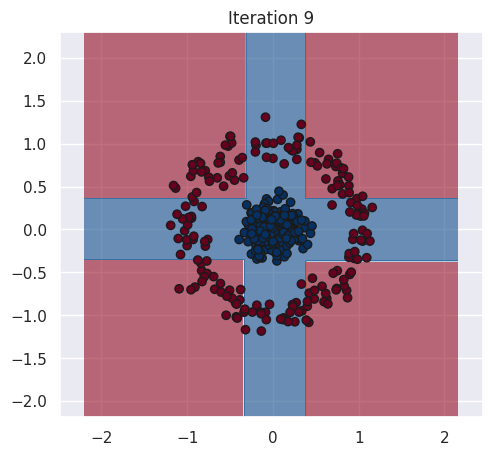

iteration :  9


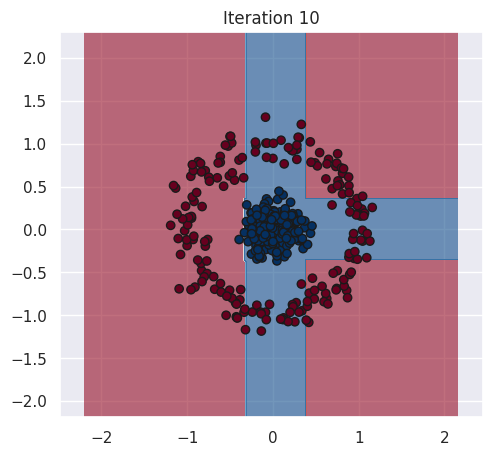

iteration :  10


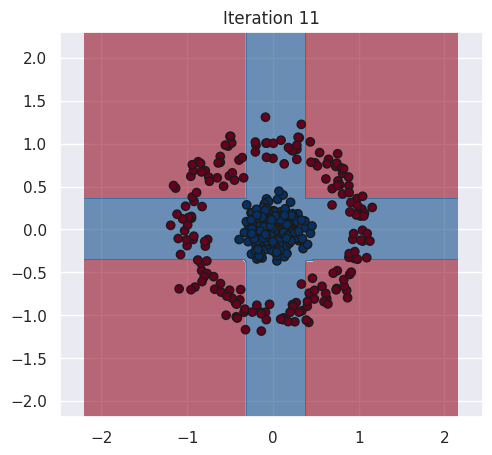

iteration :  11


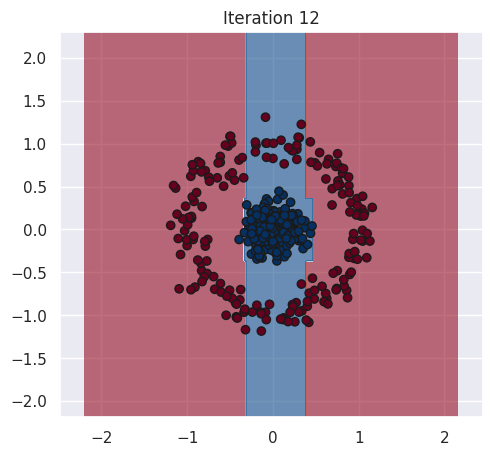

iteration :  12


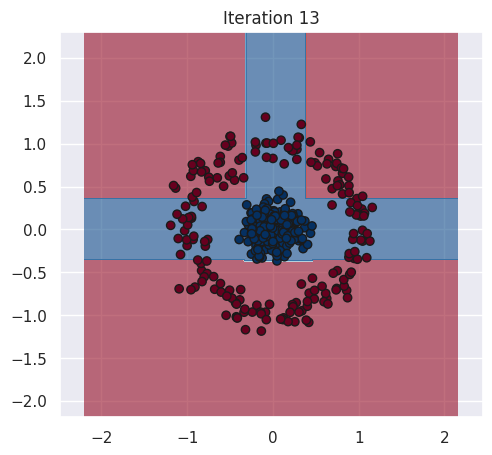

iteration :  13


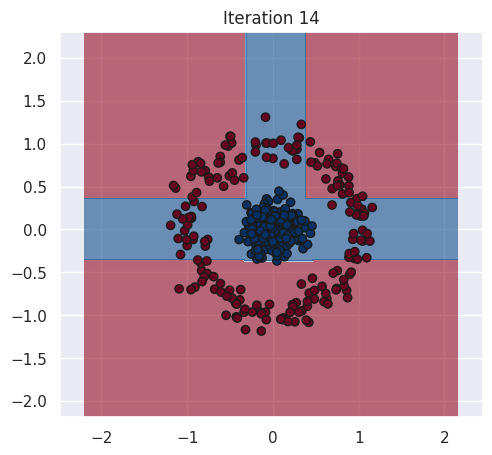

iteration :  14


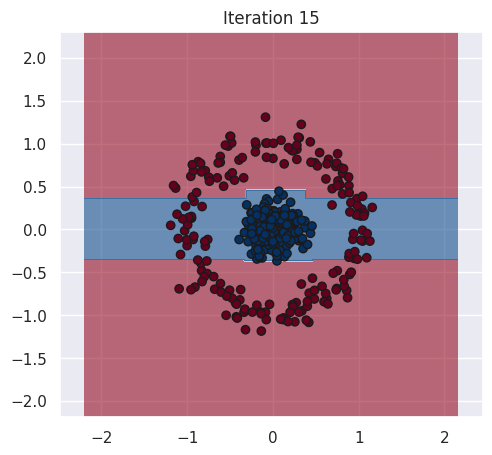

iteration :  15


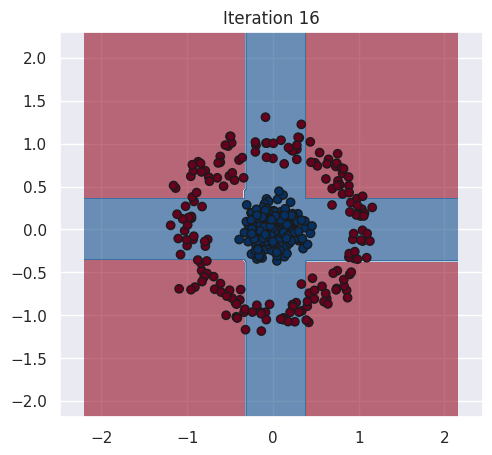

iteration :  16


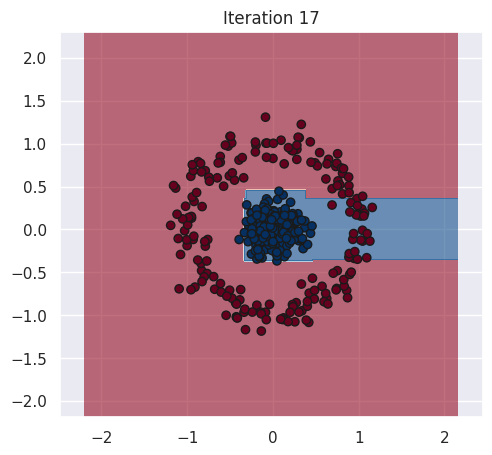

iteration :  17


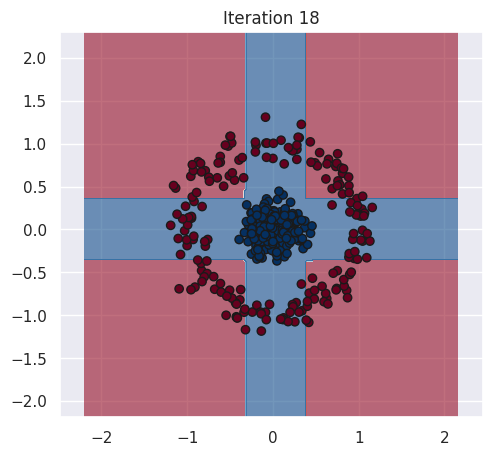

iteration :  18


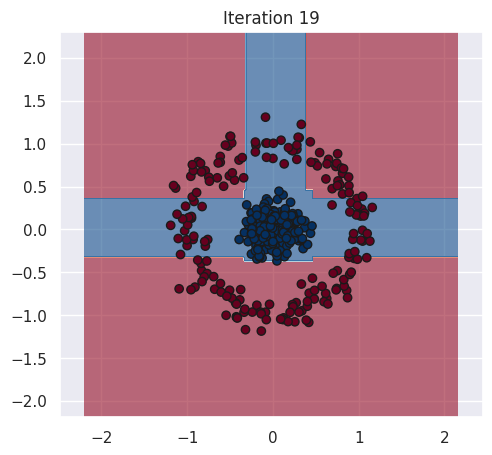

iteration :  19


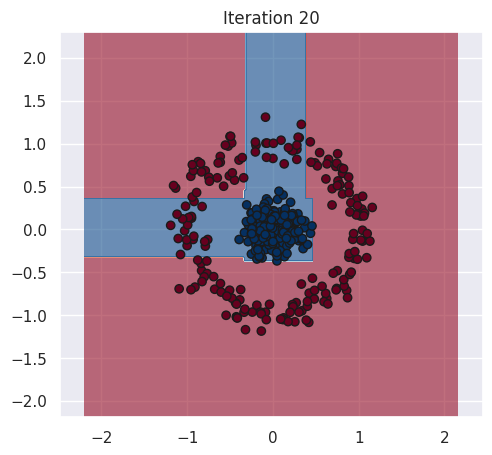

iteration :  20


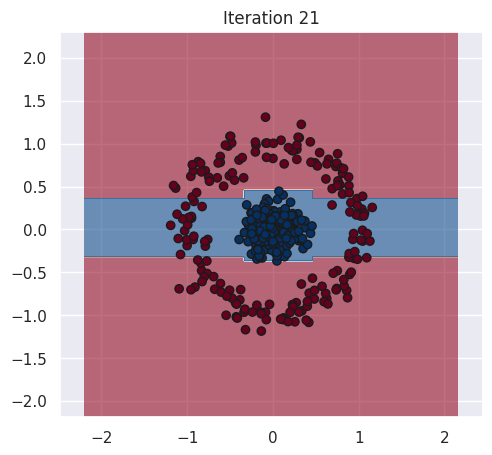

iteration :  21


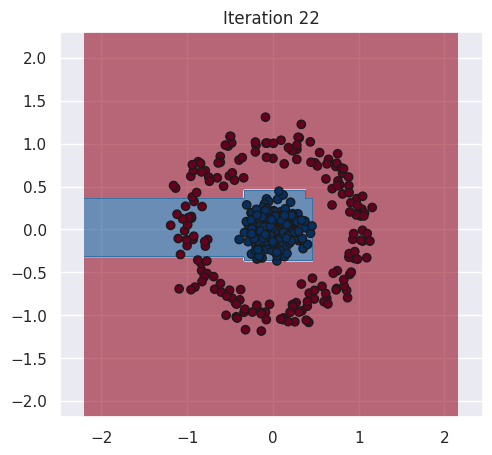

iteration :  22


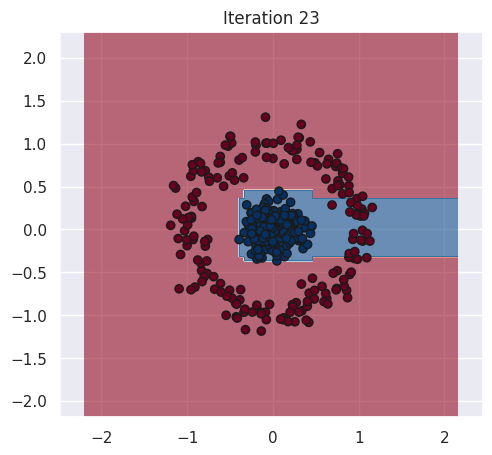

iteration :  23


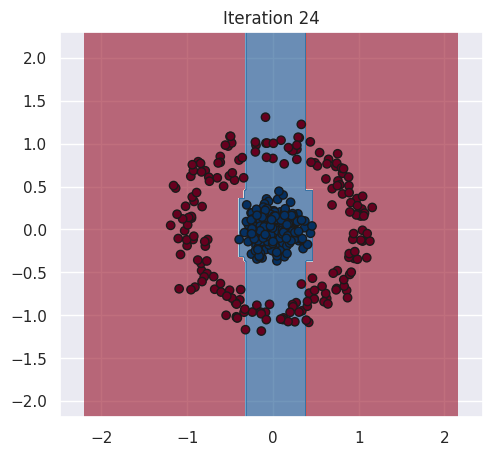

iteration :  24


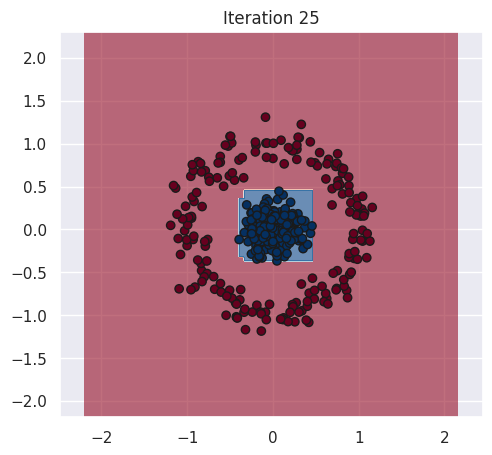

iteration :  25


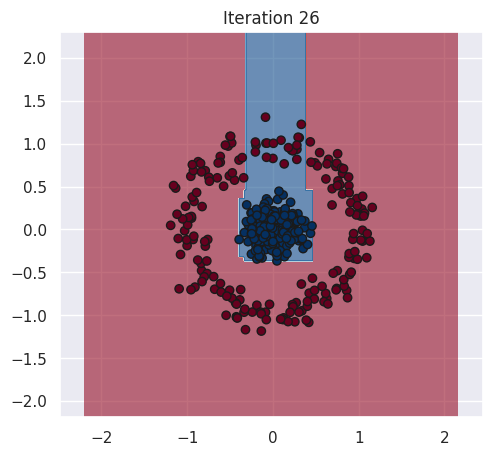

iteration :  26


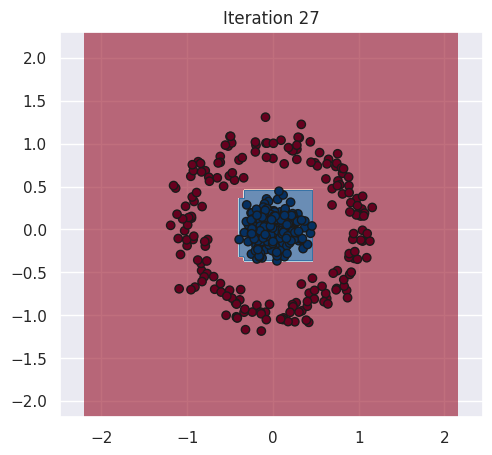

iteration :  27


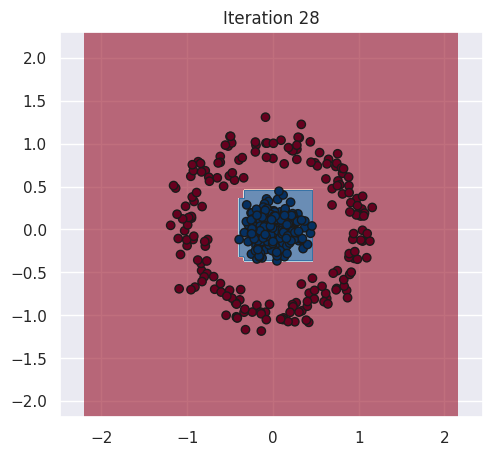

iteration :  28


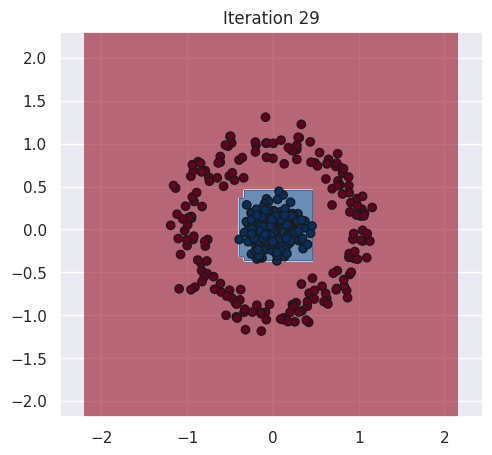

iteration :  29


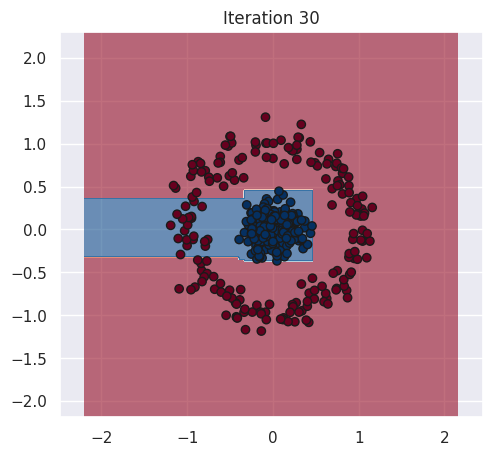

iteration :  30


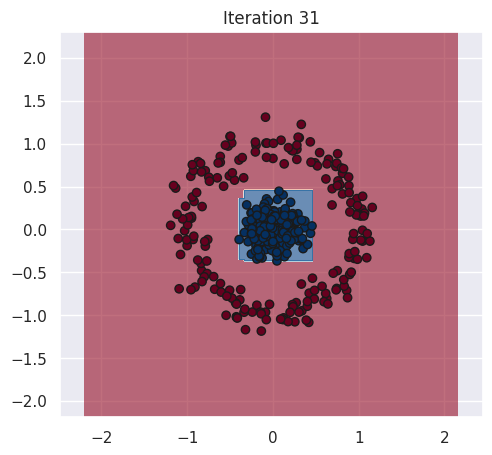

iteration :  31


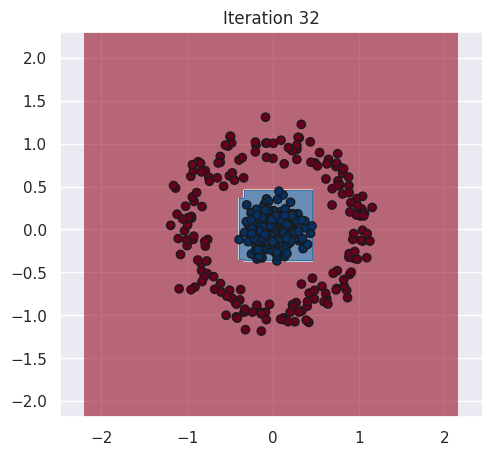

iteration :  32


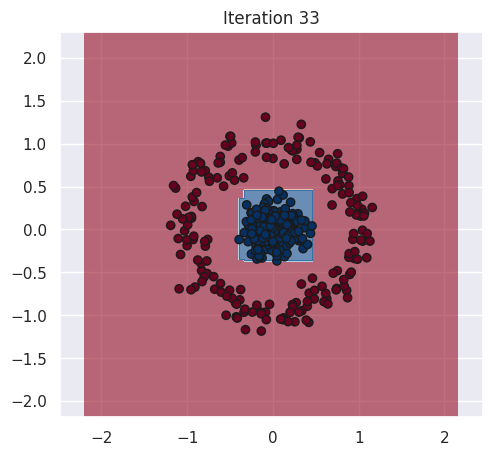

iteration :  33


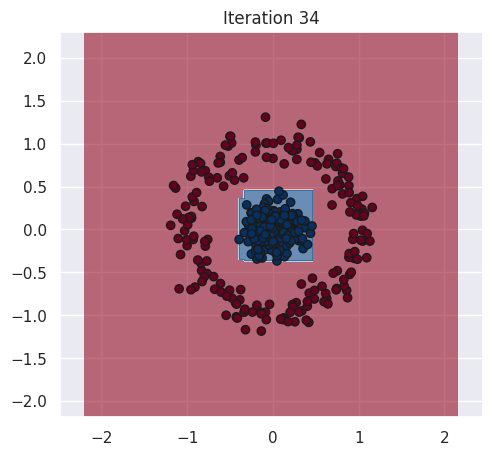

iteration :  34


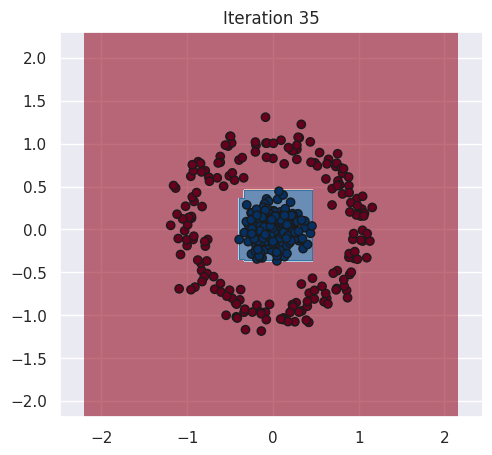

iteration :  35


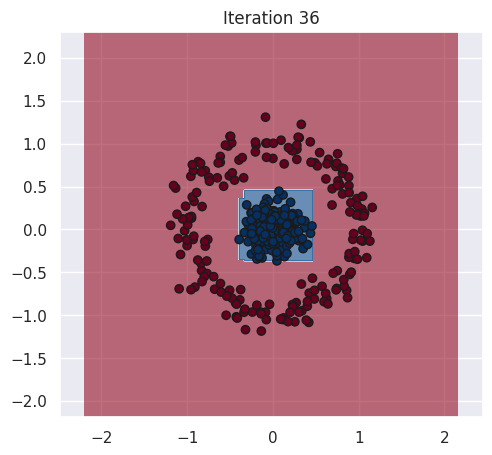

iteration :  36


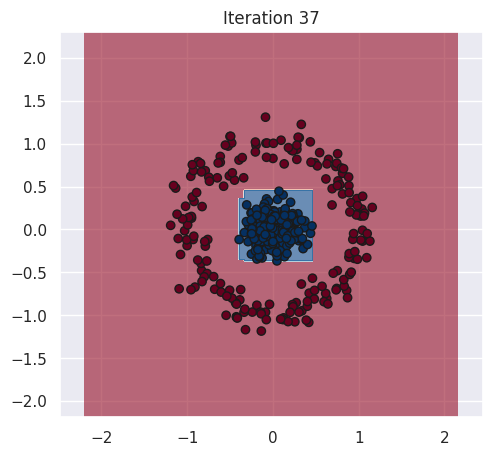

iteration :  37


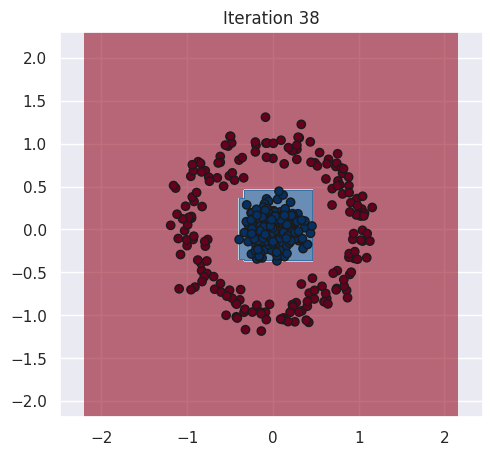

iteration :  38


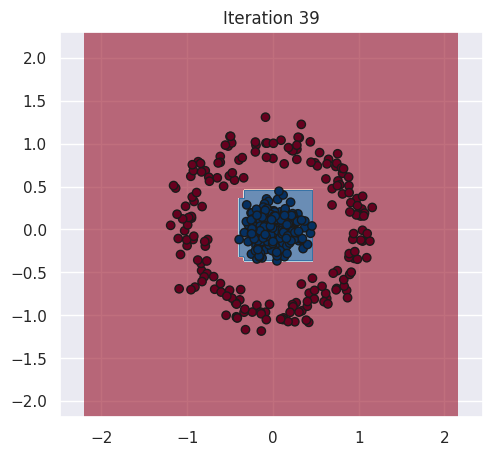

iteration :  39


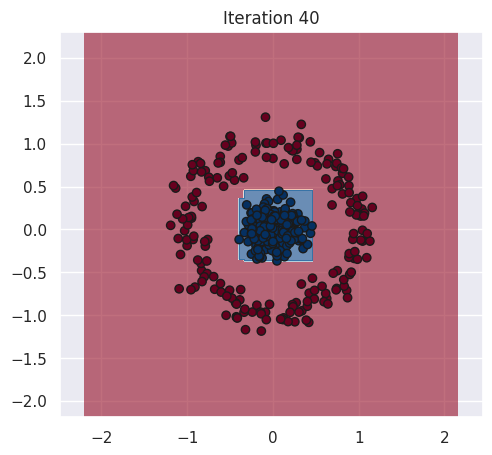

iteration :  40


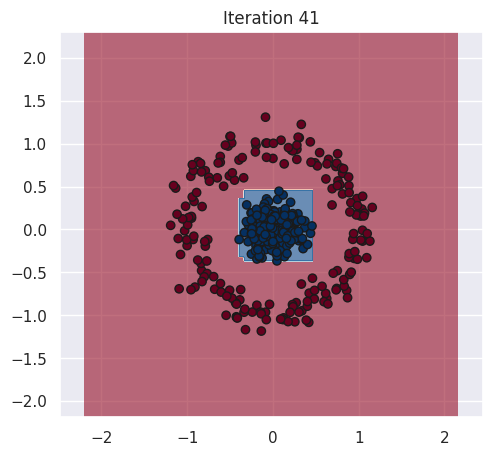

iteration :  41


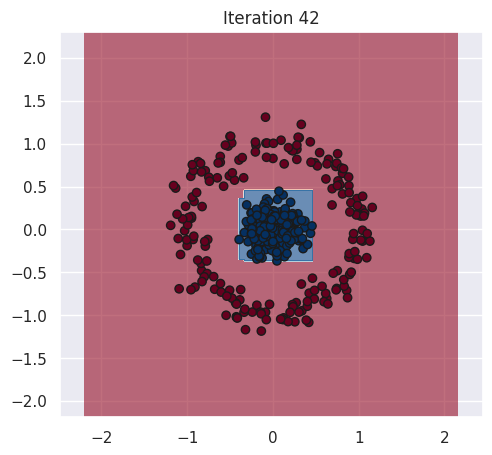

iteration :  42


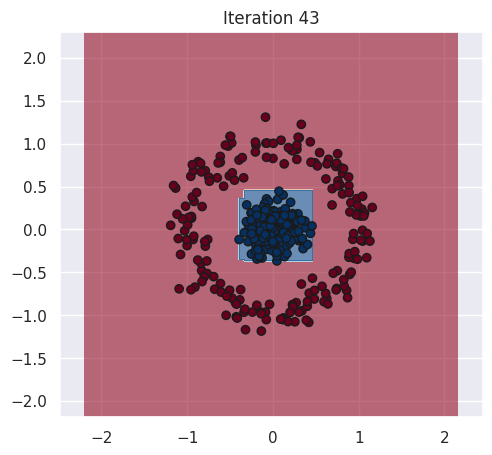

iteration :  43


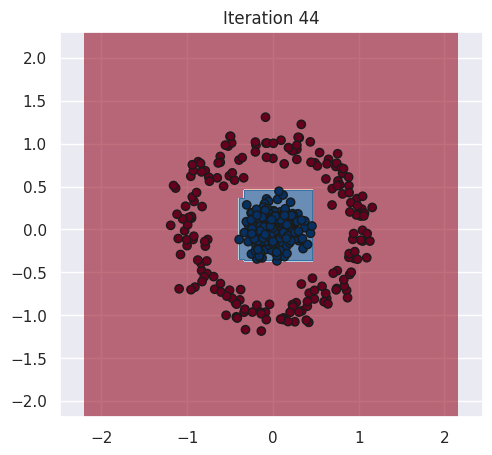

iteration :  44


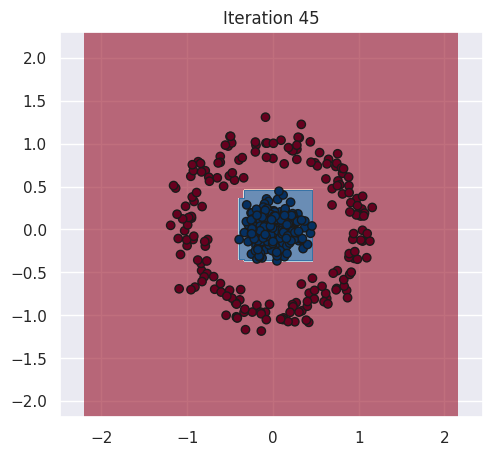

iteration :  45


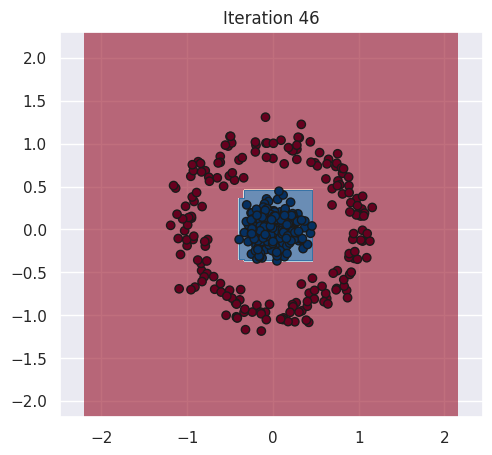

iteration :  46


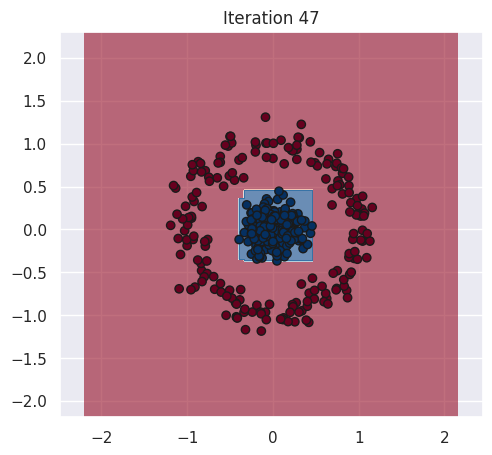

iteration :  47


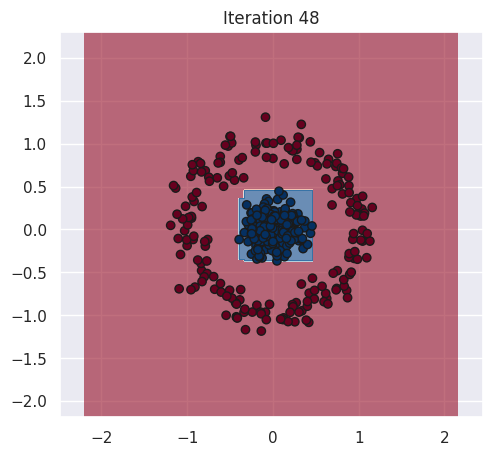

iteration :  48


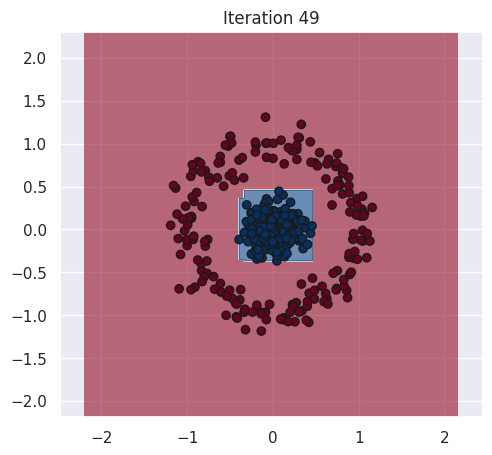

iteration :  49


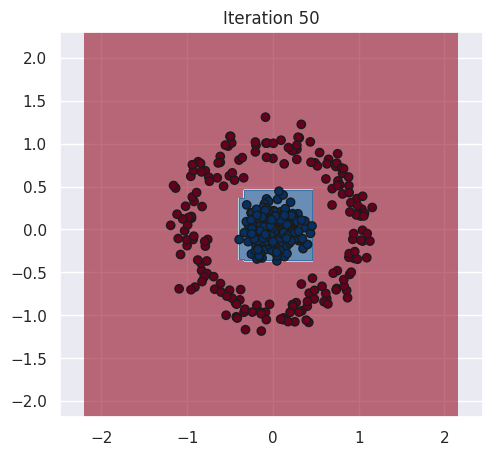

In [50]:
dt_stump.plot_iterations(X_train, y_train)

## Plot the final decision boundary

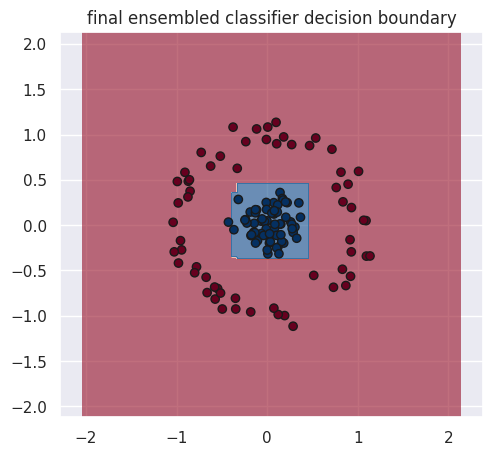

In [51]:

dt_stump.plot_decision_boundary(X_test, y_test)

# Task 2 [20 points]
# Run your Adaboost implementation with several weak classifiers such as LogReg, DecisionStump, DecisionTree(depth=3), Linear SVM, and LDA.
Tune the method’s hyperparameters (both Adaboost
and the underlying weak classifier) for maximizing the classification performance. Based on the data
visualization, you can achieve >98% performance fairly easily. Generate the decision boundary
visualizations as the above figure pair for each model class.

Classifier :  DecisionTreeClassifier
Best Params:{'learning_rate': 0.4, 'num_classifiers': 50}
Best Score: 0.989
Test Accuracy: 0.992


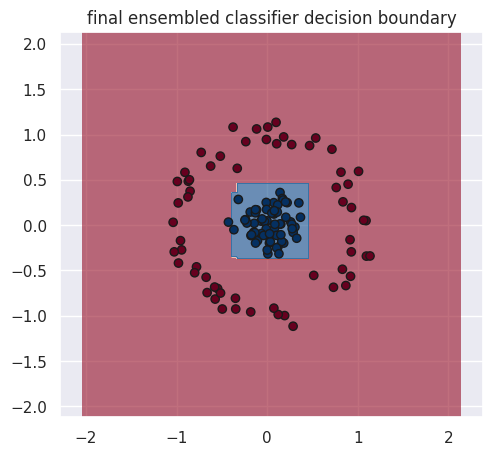

Classifier :  DecisionTreeClassifier
Best Params:{'learning_rate': 0.4, 'num_classifiers': 1000}
Best Score: 0.992
Test Accuracy: 1.000


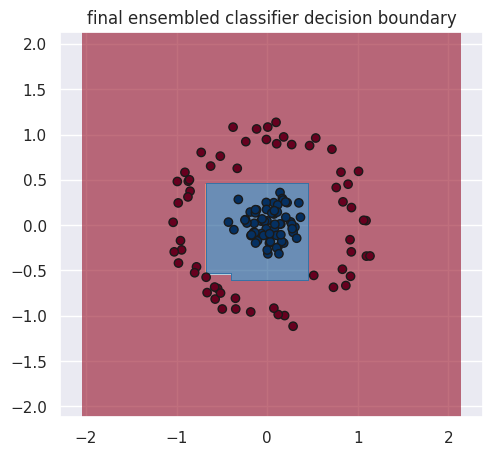

Classifier :  LinearSVC
Best Params:{'learning_rate': 0.6, 'num_classifiers': 200}
Best Score: 0.720
Test Accuracy: 0.656


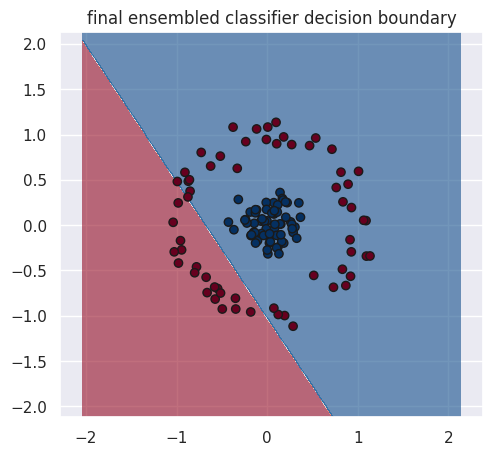

Classifier :  LogisticRegression
Best Params:{'learning_rate': 0.6, 'num_classifiers': 50}
Best Score: 0.677
Test Accuracy: 0.736


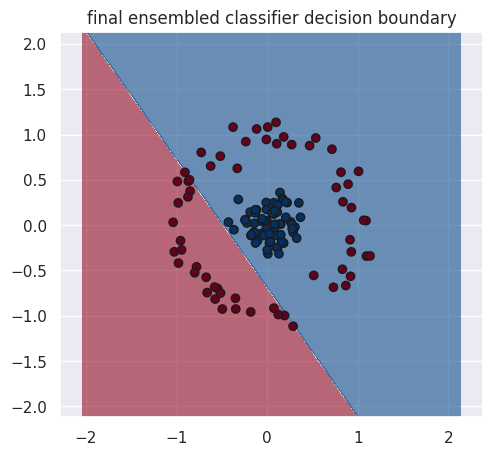

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

classifiers = [
    (DecisionTreeClassifier(max_depth=1), {'learning_rate': [0.4, 0.5, 0.6], 'num_classifiers': [20, 50, 100, 200, 250]}),
    # (LDA(), {'learning_rate': [0.4, 0.5, 0.6], 'num_classifiers': [20, 50, 100, 200, 250]}),
    (DecisionTreeClassifier(max_depth=3), {'learning_rate': [0.4, 0.5, 0.6], 'num_classifiers': [200, 250, 500, 1000]}),
    (LinearSVC(dual=True), {'learning_rate': [0.4, 0.5, 0.6], 'num_classifiers': [200, 250, 500, 1000]}),
    (LogisticRegression(), {'learning_rate': [0.4, 0.5, 0.6], 'num_classifiers': [20, 50, 100, 200, 250]})
]

for clf, param_grid in classifiers:
    grid_search = GridSearchCV(estimator=AdaBoostClassifier(clf), param_grid=param_grid, cv=5, refit=False, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print('Classifier : ', clf.__class__.__name__ )
    print('Best Params:' + repr(grid_search.best_params_))
    print('Best Score: %.3f' % grid_search.best_score_)

    model = AdaBoostClassifier(clf, **grid_search.best_params_)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"Test Accuracy: {accuracy:.3f}")

    model.plot_decision_boundary(X_test, y_test)